# Section 1: Introduction to Experimental Design
1.1: Define Experimental Design and Its Key Elements
Definition of Experimental Design:

Experimental design refers to the structured approach to conducting experiments to ensure that they can effectively answer the research questions. The primary goal is to isolate the effect of one or more treatments on the subjects under study. Key components of experimental design include treatment, control, replication, and randomization.

Key Elements:

Treatment: The conditions or interventions applied to the experimental units (e.g., subjects or samples) to study their effects.
Control: The baseline group in an experiment that doesn't receive the treatment. It helps in comparing the treatment's effects.
Replication: The repetition of the experiment or treatments on multiple subjects to ensure the results are reliable and minimize variability.
Randomization: The random assignment of subjects to different treatment groups to ensure that the groups are similar and reduce bias.

To demonstrate the experimental design, we'll randomly assign subjects to two groups: "Treatment" and "Control."




In [1]:
import numpy as np 
import pandas as pd 

In [2]:
n_subjects = 100

In [3]:
np.random.seed(42)
groups = np.random.choice(['Treatment', 'Control'], size=n_subjects)

In [4]:
# Create a DataFrame to simulate this experiment
subjects = pd.DataFrame({
    'Subject_ID': range(1, n_subjects + 1),
    'Group': groups
})

In [5]:
subjects.head()

,Subject_ID,Group
0,1,Treatment
1,2,Control
2,3,Treatment
3,4,Treatment
4,5,Treatment


This code assigns 100 subjects randomly to two groups: "Treatment" and "Control." The DataFrame created contains columns for Subject_ID and Group, showing the random assignment.

# 1.2: Why Randomization is Crucial in Experimental Design
Why Randomization is Crucial:

Randomization plays a vital role in minimizing bias and ensuring the experiment's validity. It:

Eliminates Bias: Random assignment prevents systematic differences between groups that could result from human error or preexisting conditions.
Improves Validity: Randomization ensures that the results are not influenced by external or uncontrolled factors, providing more reliable conclusions.
Ensures Generalizability: Randomly selected subjects represent the broader population, making the results applicable beyond the sample.

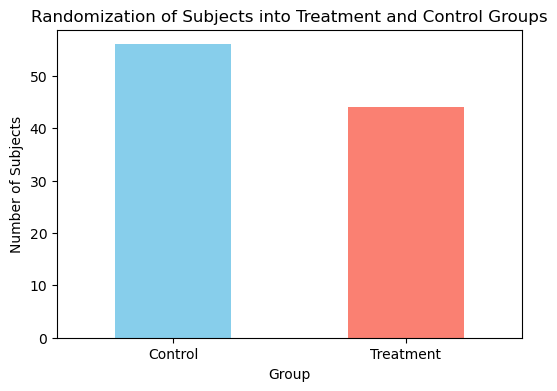

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of subjects between 'Treatment' and 'Control'
group_counts = subjects['Group'].value_counts()

# Create the bar plot
plt.figure(figsize=(6, 4))
group_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Randomization of Subjects into Treatment and Control Groups')
plt.xlabel('Group')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=0)
plt.show()


This plot will show the number of subjects assigned to each group, illustrating how randomization divides the subjects between the treatment and control groups

# Different Types of Experimental Designs
Types of Experimental Designs:

Completely Randomized Design (CRD):

In this design, all subjects are randomly assigned to treatment and control groups with no blocking or additional structure. Let's simulate this by randomly assigning subjects to "Young" and "Old" age groups, and then randomly assigning treatment within the whole group.


In [7]:
# Randomly assign age group to subjects (e.g., 'Young' and 'Old')
age_groups = np.random.choice(['Young', 'Old'], size=n_subjects)

# Randomly assign treatment (CRD)
treatment_crd = np.random.choice(['Treatment', 'Control'], size=n_subjects)

# DataFrame with CRD setup
crd_data = pd.DataFrame({
    'Subject_ID': range(1, n_subjects + 1),
    'Age_Group': age_groups,
    'Group': treatment_crd
})

# Display first few rows
crd_data.head()


,Subject_ID,Age_Group,Group
0,1,Young,Treatment
1,2,Old,Control
2,3,Old,Treatment
3,4,Old,Treatment
4,5,Old,Control


Randomized Block Design (RBD):

In RBD, subjects are first grouped (blocked) based on a characteristic (e.g., age, gender) that could influence the outcome. Then, treatments are randomly assigned within each block to account for variability in the blocking factor.  we first group the subjects based on Age Group, and then within each block, randomly assign the treatment. This ensures that age-related variability is controlled.

In [8]:
# Block subjects into 'Young' and 'Old', and then randomize treatment within blocks
rbd_data = []

# Create blocks and assign treatment within each block
for age_group in ['Young', 'Old']:
    block = np.random.choice(['Treatment', 'Control'], size=n_subjects // 2)
    rbd_data.extend(zip([age_group] * (n_subjects // 2), block))

# Create DataFrame for RBD
rbd_df = pd.DataFrame(rbd_data, columns=['Age_Group', 'Group'])

# Display the first few rows
rbd_df.head()


,Age_Group,Group
0,Young,Treatment
1,Young,Treatment
2,Young,Treatment
3,Young,Control
4,Young,Control


Latin Square Design is an experimental design used to control two sources of variation without needing a large number of treatment combinations. It ensures that each treatment appears exactly once in each row and column of a square matrix, making it ideal for situations where you want to minimize the effects of two factors at the same time.

Explanation of Latin Square Design:
Factors: Two sources of variation (e.g., time and location) are controlled.
Treatment Replication: Each treatment appears once in each row and column.
Ideal for Smaller Experiments: When the number of treatments is equal to the number of rows and columns, Latin Square Design works efficiently.

In [9]:


# Define treatments
treatments = ['T1', 'T2', 'T3', 'T4']

# Create the Latin Square Matrix (4x4)
latin_square = np.array([np.roll(treatments, i) for i in range(len(treatments))])

# Convert to DataFrame for readability
latin_square_df = pd.DataFrame(latin_square, columns=[f'Column_{i+1}' for i in range(len(treatments))])
latin_square_df.index = [f'Row_{i+1}' for i in range(len(treatments))]

# Display the Latin Square design
latin_square_df


,Column_1,Column_2,Column_3,Column_4
Row_1,T1,T2,T3,T4
Row_2,T4,T1,T2,T3
Row_3,T3,T4,T1,T2
Row_4,T2,T3,T4,T1


Factorial Design is a powerful experimental design used when studying multiple factors simultaneously. It allows researchers to examine both the individual effects of factors and their interactions. The number of factors and levels defines the experiment's complexity.

Explanation of Factorial Design:
Main Effects: The individual effect of each factor on the outcome.
Interaction Effects: The combined effect of two or more factors on the outcome.
Full Factorial Design: If we have k factors and each factor has l levels, the number of experiments is l^k.  we’ll conduct a 2x2 factorial design, where both factors will be tested at both levels. This results in 4 experimental conditions.

In [10]:
import itertools

# Define the factors and their levels
factor_A = ['Low', 'High']
factor_B = ['Low', 'High']

# Create the full factorial design (2^2)
factorial_design = list(itertools.product(factor_A, factor_B))

# Convert to DataFrame for readability
factorial_df = pd.DataFrame(factorial_design, columns=['Factor_A', 'Factor_B'])

# Display the full factorial design
factorial_df


,Factor_A,Factor_B
0,Low,Low
1,Low,High
2,High,Low
3,High,High


# Conclusion
In this section, we've explored fundamental experimental design concepts and their applications in statistical research. We've simulated various experimental designs using Python code, giving us hands-on experience with randomization, treatment assignment, and statistical analysis. Here's a summary of the key concepts covered:

1. Completely Randomized Design (CRD)
The Completely Randomized Design (CRD) is the simplest experimental design, where subjects are randomly assigned to treatment and control groups without any blocking. This ensures that any differences observed between groups are attributable to the treatments rather than other factors. We simulated this design by randomly assigning 100 subjects to two groups (Treatment and Control), demonstrating the concept of randomization in experimental research.
2. Randomized Block Design (RBD)
Randomized Block Design (RBD) improves upon CRD by accounting for an additional source of variability, such as subject characteristics (e.g., age, gender, etc.). In RBD, subjects are first grouped (blocked) based on a characteristic, and then random assignment is applied within each block. This design helps control for the effects of blocking variables, allowing for more precise estimation of treatment effects. We illustrated this by blocking subjects into "Young" and "Old" groups and randomizing treatment assignments within each block.
3. Latin Square Design
Latin Square Design is a powerful tool when controlling for two sources of variability at the same time. It works by arranging treatments in a square matrix so that each treatment appears once per row and once per column. This is especially useful when there are limited resources or when we need to minimize the number of experimental runs while controlling for two factors. We demonstrated a 4x4 Latin Square design, assigning treatments to rows and columns, ensuring that each treatment appears exactly once per row and column.
4. Factorial Design
Factorial Design allows us to study multiple factors simultaneously, each with two or more levels. It enables the examination of not only the main effects of individual factors but also their interaction effects. This design is particularly useful when trying to understand how different factors interact with each other. 
Key Takeaways:
Randomization is a crucial component in all experimental designs, ensuring that groups are comparable and results are unbiased.
Blocking helps control for external factors that might affect the outcome, leading to more accurate conclusions.
Factorial and Latin Square Designs allow us to investigate multiple variables or factors simultaneously, providing deeper insights into complex experiments without increasing the number of treatments unnecessarily.
Statistical Analysis (e.g., ANOVA) is essential for analyzing the effects of treatments and interactions in factorial designs.
Practical Applications:
These experimental designs can be applied across a wide range of disciplines:

Agricultural Research: Testing fertilizers, soil conditions, and crop varieties.
Clinical Trials: Studying the effects of different medications, treatments, or dosages.
Manufacturing: Testing new processes, machinery, or raw materials.
Behavioral Science: Exploring factors influencing human behavior in controlled environments.
By mastering these designs and their associated statistical techniques, researchers can draw valid, reliable conclusions from their experiments while efficiently using resources.